In [1]:
import pandas as pd
import numpy as np
from pylab import rcParams
from math import *
import scipy.stats
from scipy.stats import lognorm
rcParams['figure.figsize'] = 16, 9

In [2]:
table = pd.read_csv('Detailed_Statistics_Airborne-2.csv', delimiter = ",")

In [3]:
table

,Carrier Code,Date (MM/DD/YYYY),Flight_Number,Tail Number,Origin Airport,Destination Airport,Airborne Time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,01/01/2004,1912.0,NaN,LAX,SFO,0.0,0.0,0.0,0.0,0.0,0.0
1,AA,01/01/2004,1920.0,N442AA,LAX,SFO,74.0,0.0,0.0,32.0,0.0,0.0
2,AA,01/01/2004,1928.0,NaN,LAX,SFO,0.0,0.0,0.0,0.0,0.0,0.0
3,AA,01/01/2004,1936.0,N442AA,LAX,SFO,55.0,23.0,0.0,1.0,0.0,11.0
4,AA,01/01/2004,1942.0,N513AA,LAX,SFO,57.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31115,AA,07/03/2020,2511.0,N836AW,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0
31116,AA,07/04/2020,2511.0,N837AW,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0
31117,AA,07/05/2020,2511.0,N764US,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0
31118,AA,07/06/2020,2511.0,N765US,LAX,SFO,57.0,0.0,0.0,0.0,0.0,0.0


In [4]:
table.dropna()

,Carrier Code,Date (MM/DD/YYYY),Flight_Number,Tail Number,Origin Airport,Destination Airport,Airborne Time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
1,AA,01/01/2004,1920.0,N442AA,LAX,SFO,74.0,0.0,0.0,32.0,0.0,0.0
3,AA,01/01/2004,1936.0,N442AA,LAX,SFO,55.0,23.0,0.0,1.0,0.0,11.0
4,AA,01/01/2004,1942.0,N513AA,LAX,SFO,57.0,0.0,0.0,0.0,0.0,0.0
5,AA,01/01/2004,1950.0,N421AA,LAX,SFO,58.0,0.0,0.0,0.0,0.0,0.0
6,AA,01/01/2004,1958.0,N513AA,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31114,AA,07/02/2020,2511.0,N758US,LAX,SFO,51.0,0.0,0.0,0.0,0.0,0.0
31115,AA,07/03/2020,2511.0,N836AW,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0
31116,AA,07/04/2020,2511.0,N837AW,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0
31117,AA,07/05/2020,2511.0,N764US,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0


In [5]:
t = np.array(table['Airborne Time (Minutes)'])

In [6]:
t = t[:-1]

In [8]:
tail_numbers = list(set(table['Tail Number'].dropna()))
flight_numbers = list(set(table['Flight_Number'].dropna()))

In [9]:
flight_numbers = list(set(table['Flight_Number'].dropna()))

In [10]:
#build tables for every tail_number

In [11]:
tail_number_tails = []
for tail in tail_numbers:
    tail_number_tails.append(table.loc[table['Tail Number'] == tail])

In [12]:
tail_number_tails[2].shape

(4, 12)

In [13]:
sizes = []
idx = 0
for obj in tail_number_tails:
    sizes.append((obj.shape[0], idx))
    idx += 1

In [14]:
sizes.sort()

In [19]:
v1920 = table.loc[table['Tail Number'] == tail_numbers[0]]

In [20]:
v1920withzero = v1920.loc[v1920['Airborne Time (Minutes)'] > 100].index
v1920 = v1920.drop(v1920withzero)

In [21]:
v1920['Airborne Time (Minutes)']

29639    60.0
30389    52.0
30392    51.0
30397    57.0
30402    54.0
30856    58.0
Name: Airborne Time (Minutes), dtype: float64

In [22]:
v = table['Flight_Number'].dropna()

In [23]:
tails = table['Tail Number'].dropna()

In [24]:
vals = [val for val in v]

In [25]:
vals = set(vals)

In [26]:
tails = set([tail for tail in tails])

In [27]:
len(vals)

134

In [28]:
v1920 = table.loc[table['Flight_Number'] == 108.0]
v1920withzero = v1920.loc[v1920['Airborne Time (Minutes)'] == 0].index
v1920 = v1920.drop(v1920withzero)

In [29]:
table['Delay National Aviation System (Minutes)']

0         0.0
1        32.0
2         0.0
3         1.0
4         0.0
         ... 
31115     0.0
31116     0.0
31117     0.0
31118     0.0
31119     NaN
Name: Delay National Aviation System (Minutes), Length: 31120, dtype: float64

In [30]:
criteria = table.loc[table['Delay National Aviation System (Minutes)'] ==0].index

In [31]:
table_national_system = table.drop(criteria)

In [32]:
table_weather = table.drop(table.loc[table['Delay Weather (Minutes)'] ==0].index)

In [36]:
import matplotlib.pyplot as plt

(array([39., 10.,  4.,  4.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
         0.,  1.]),
 array([  1.        ,  19.26666667,  37.53333333,  55.8       ,
         74.06666667,  92.33333333, 110.6       , 128.86666667,
        147.13333333, 165.4       , 183.66666667, 201.93333333,
        220.2       , 238.46666667, 256.73333333, 275.        ]),
 <BarContainer object of 15 artists>)

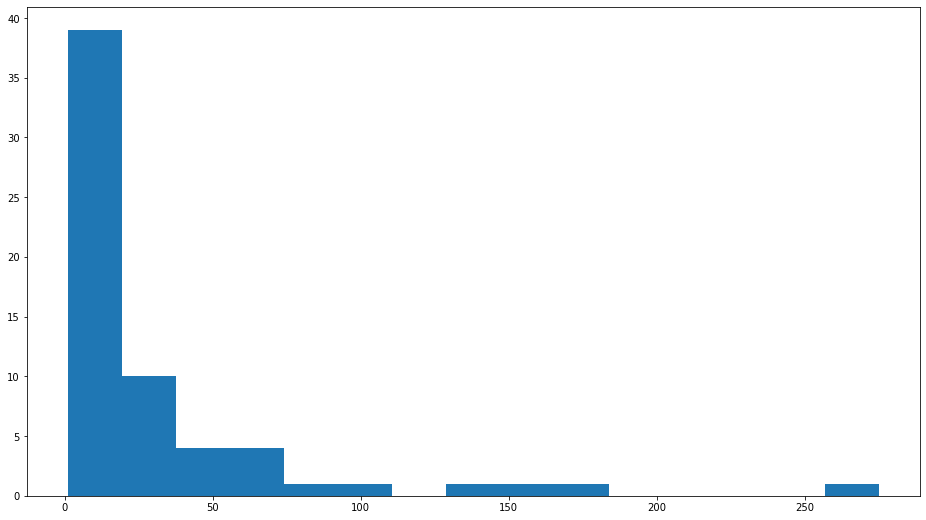

In [37]:
plt.hist(table_weather['Delay Weather (Minutes)'], bins = 15)

In [38]:
from statsmodels.distributions.empirical_distribution import ECDF
sample = np.sort(np.array(table_weather['Delay Weather (Minutes)']))[:-1]
print(sample)
y = ECDF(sample[:-1])

[  1.   1.   2.   2.   2.   3.   3.   4.   4.   4.   4.   5.   5.   6.
   6.   6.   6.   7.   7.   8.   8.   8.   9.  10.  10.  10.  11.  11.
  12.  12.  13.  13.  14.  14.  15.  15.  17.  18.  18.  21.  24.  27.
  28.  29.  31.  35.  36.  37.  37.  39.  45.  48.  48.  59.  61.  65.
  70.  75. 101. 142. 154. 166. 275.]


In [39]:
sample.mean()

31.38095238095238

[]

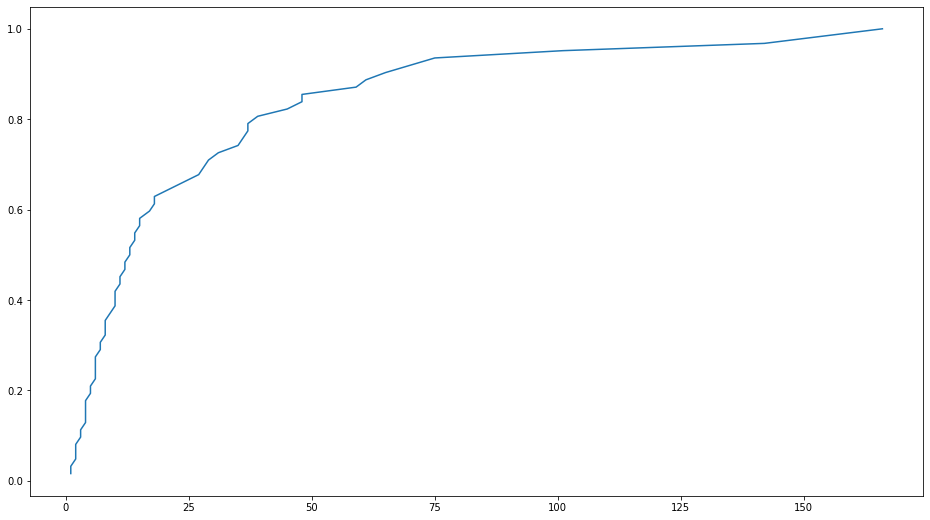

In [40]:
plt.plot(y.x, y.y)
plt.plot()

In [41]:
from statsmodels.distributions.empirical_distribution import ECDF
sample.sort()
y = ECDF(sample)(sample)

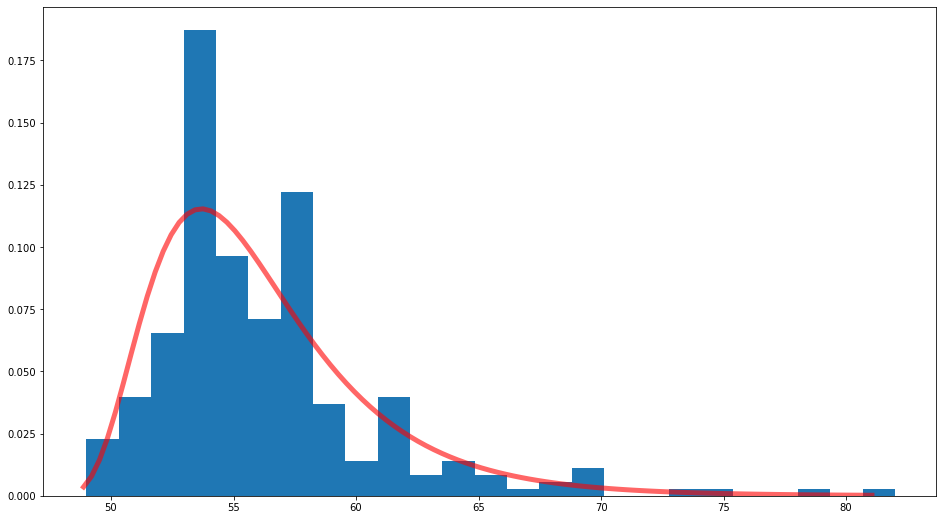

In [42]:
v1920 = table.loc[table['Flight_Number'] == 108.0]
v1920withzero = v1920.loc[v1920['Airborne Time (Minutes)'] == 0].index
v1920 = v1920.drop(v1920withzero)
s1, loc1, scale1 = lognorm.fit(v1920['Airborne Time (Minutes)'])
plt.hist(v1920['Airborne Time (Minutes)'], bins = 25, density = True)
x = np.linspace(lognorm.ppf(0.001,s = s1, loc = loc1, scale = scale1), lognorm.ppf(0.999, s = s1, loc = loc1, scale = scale1), 100)
plt.plot(x, lognorm.pdf(x, s = s1, loc = loc1, scale = scale1), 'r-', lw=5, alpha=0.6, label='lognorm pdf')

In [43]:
v1920 = table.loc[table['Flight_Number'] == 1920.0]

In [44]:
v1920withzero = v1920.loc[v1920['Airborne Time (Minutes)'] == 0].index

In [45]:
v1920withzero.shape

(56,)

In [46]:
56/2791 #2 процента не летали

0.0200644930132569

In [47]:
v1920withzero = v1920.loc[v1920['Airborne Time (Minutes)'] == 0].index
v1920 = v1920.drop(v1920withzero)

In [48]:
ar = np.array(v1920['Airborne Time (Minutes)'])

In [49]:
from matplotlib import pyplot as plt

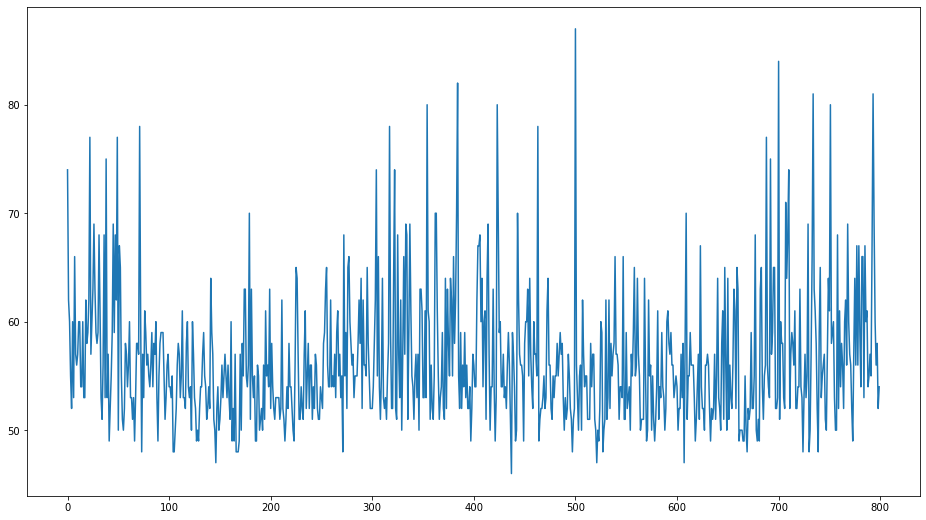

In [50]:
plt.plot(ar[:800])

In [51]:
v1920.iloc[350]

Carrier Code                                        AA
Date (MM/DD/YYYY)                           01/24/2005
Flight_Number                                     1920
Tail Number                                     N4UEAA
Origin Airport                                     LAX
Destination Airport                                SFO
Airborne Time (Minutes)                             53
Delay Carrier (Minutes)                              0
Delay Weather (Minutes)                              0
Delay National Aviation System (Minutes)             0
Delay Security (Minutes)                             0
Delay Late Aircraft Arrival (Minutes)                0
Name: 2604, dtype: object

In [52]:
import matplotlib.pyplot as plt

In [53]:
t = e

In [54]:
print(t)

2.718281828459045


In [55]:
mean, var, skew, kurt = lognorm.stats(s = 2, loc = 1, scale = 3, moments='mvsk')

In [56]:
mean

array(23.1671683)

In [57]:
mu = v1920['Airborne Time (Minutes)'].mean()
sigma = sqrt(np.square(v1920['Airborne Time (Minutes)']).mean() - t*t)

In [58]:
s1, loc1, scale1 = lognorm.fit(v1920['Airborne Time (Minutes)'])

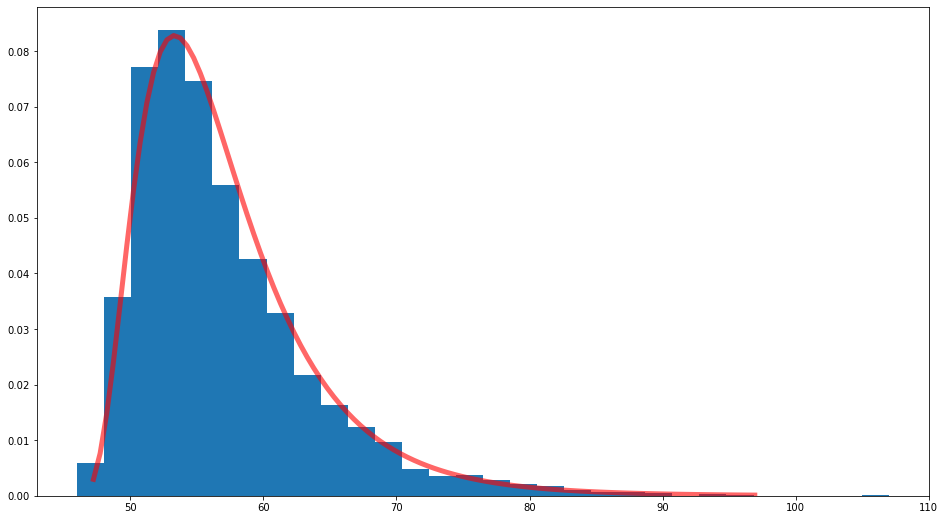

In [60]:
plt.hist(v1920['Airborne Time (Minutes)'], bins = 30, density = True)
x = np.linspace(lognorm.ppf(0.001,s = s1, loc = loc1, scale = scale1), lognorm.ppf(0.999, s = s1, loc = loc1, scale = scale1), 100)
plt.plot(x, lognorm.pdf(x, s = s1, loc = loc1, scale = scale1), 'r-', lw=5, alpha=0.6, label='lognorm pdf')

In [61]:
from scipy.stats import kstest

In [62]:
kstest(v1920['Airborne Time (Minutes)'], 'lognorm', (s1, loc1, scale1))

KstestResult(statistic=0.05161657119318536, pvalue=8.987097162345049e-07)

In [63]:
v1928 = table.loc[table['Flight_Number'] == 1928.0]

In [64]:
v1928withzero = v1928.loc[v1928['Airborne Time (Minutes)'] == 0].index
v1928 = v1928.drop(v1928withzero)

(array([0.00318529, 0.03185293, 0.07350676, 0.08992327, 0.07963233,
        0.05782532, 0.04140881, 0.03430316, 0.02523732, 0.01715158,
        0.01543642, 0.00661561, 0.00710565, 0.00735068, 0.0053905 ,
        0.00588054, 0.00490045, 0.00392036, 0.00245023, 0.00147014,
        0.00171516, 0.00098009, 0.00147014, 0.        , 0.00049005,
        0.00073507, 0.        , 0.00122511, 0.00024502, 0.00024502,
        0.00024502, 0.        , 0.        , 0.00024502, 0.00024502]),
 array([ 46.        ,  47.91428571,  49.82857143,  51.74285714,
         53.65714286,  55.57142857,  57.48571429,  59.4       ,
         61.31428571,  63.22857143,  65.14285714,  67.05714286,
         68.97142857,  70.88571429,  72.8       ,  74.71428571,
         76.62857143,  78.54285714,  80.45714286,  82.37142857,
         84.28571429,  86.2       ,  88.11428571,  90.02857143,
         91.94285714,  93.85714286,  95.77142857,  97.68571429,
         99.6       , 101.51428571, 103.42857143, 105.34285714,
        10

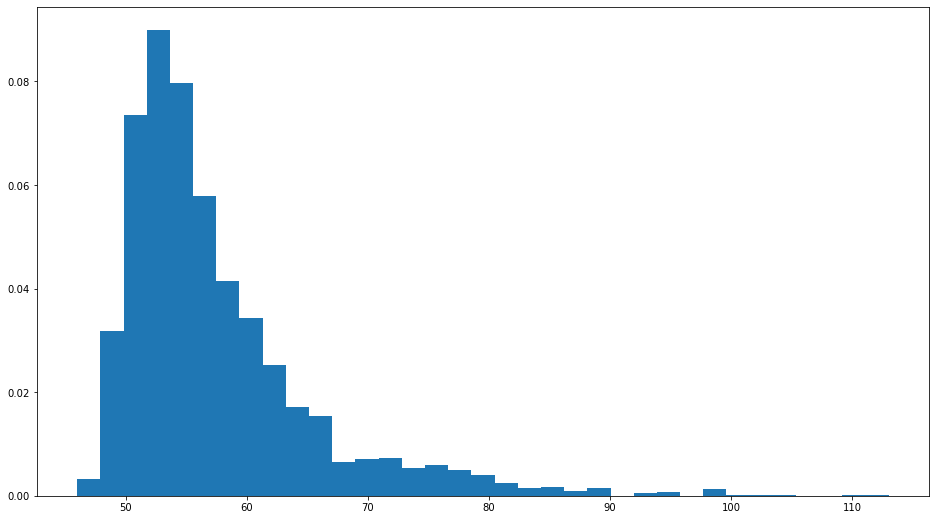

In [65]:
plt.hist(v1928['Airborne Time (Minutes)'], bins = 35, density = True)

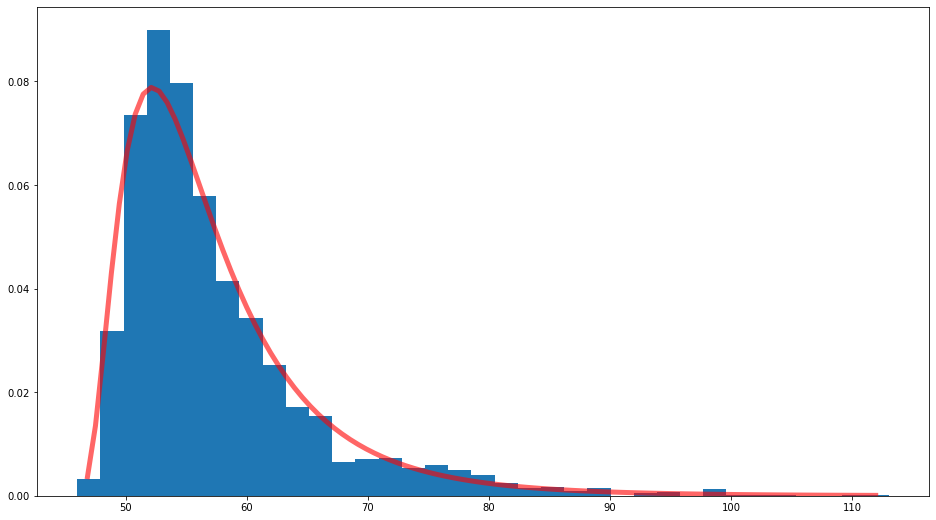

In [66]:
plt.hist(v1928['Airborne Time (Minutes)'], bins = 35, density = True)
s1, loc1, scale1 = lognorm.fit(v1928['Airborne Time (Minutes)'])
x = np.linspace(lognorm.ppf(0.001,s = s1, loc = loc1, scale = scale1), lognorm.ppf(0.999, s = s1, loc = loc1, scale = scale1), 100)
plt.plot(x, lognorm.pdf(x, s = s1, loc = loc1, scale = scale1), 'r-', lw=5, alpha=0.6, label='lognorm pdf')

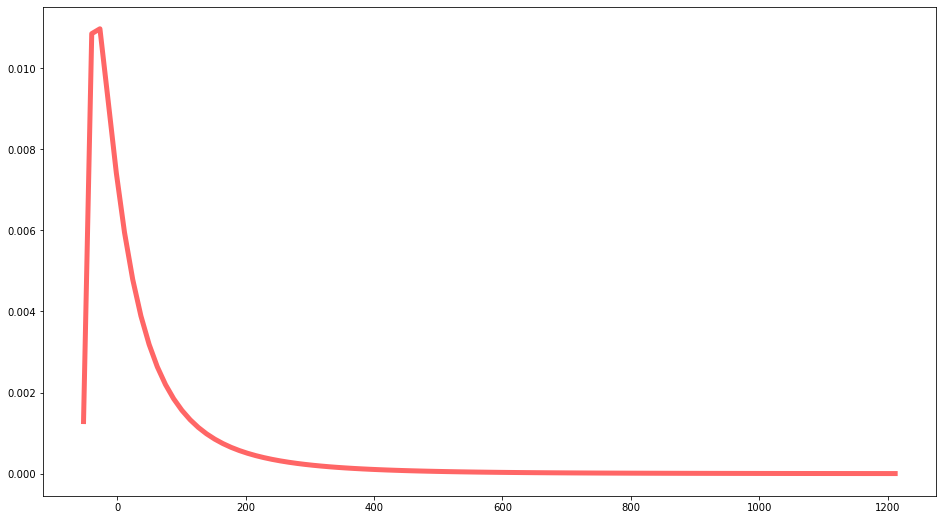

In [67]:
x = np.linspace(lognorm.ppf(0.001,s = 1, loc = t - sigma, scale = sigma), lognorm.ppf(0.999, s = 1, loc = t - sigma, scale = sigma), 100)
plt.plot(x, lognorm.pdf(x, s = 1, loc = t - sigma, scale = sigma), 'r-', lw=5, alpha=0.6, label='lognorm pdf')

In [68]:
import scipy.stats
from scipy.stats import lognorm

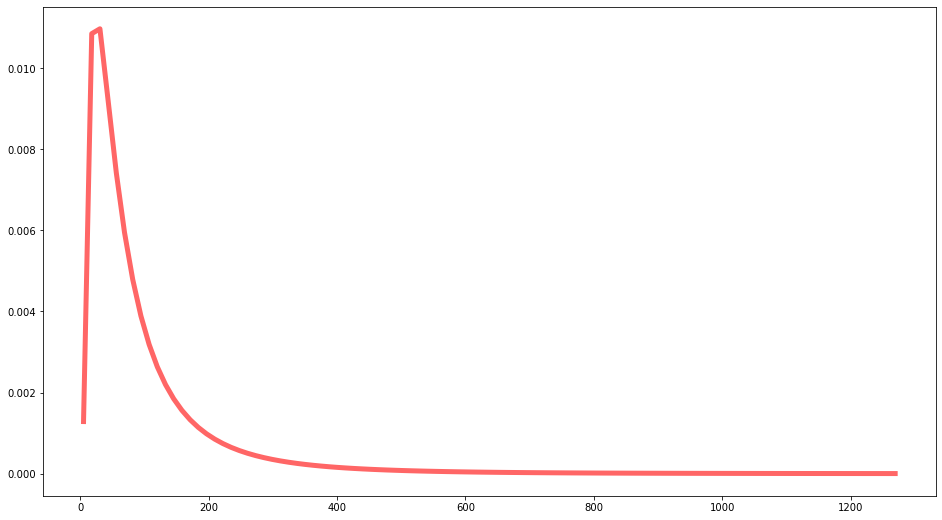

In [69]:
x = np.linspace(lognorm.ppf(0.001,s = 1, loc = t, scale = sigma), lognorm.ppf(0.999, s = 1, loc = t, scale = sigma), 100)
plt.plot(x, lognorm.pdf(x, s = 1, loc = t, scale = sigma), 'r-', lw=5, alpha=0.6, label='lognorm pdf')

In [70]:
secur = table.loc[table['Delay Security (Minutes)'] == 0].index

secur_table = table.drop(secur)

In [71]:
secur_table = secur_table[:-1]

In [72]:
t = list(secur_table['Delay Security (Minutes)'])[:-1]

In [73]:
t

[18.0,
 149.0,
 175.0,
 116.0,
 4.0,
 11.0,
 9.0,
 12.0,
 21.0,
 6.0,
 13.0,
 11.0,
 13.0,
 36.0,
 5.0,
 3.0,
 17.0,
 91.0,
 37.0]

In [74]:
from statsmodels.distributions.empirical_distribution import ECDF
sample = np.sort(t)
print(sample)
y = ECDF(sample)

[  3.   4.   5.   6.   9.  11.  11.  12.  13.  13.  17.  18.  21.  36.
  37.  91. 116. 149. 175.]


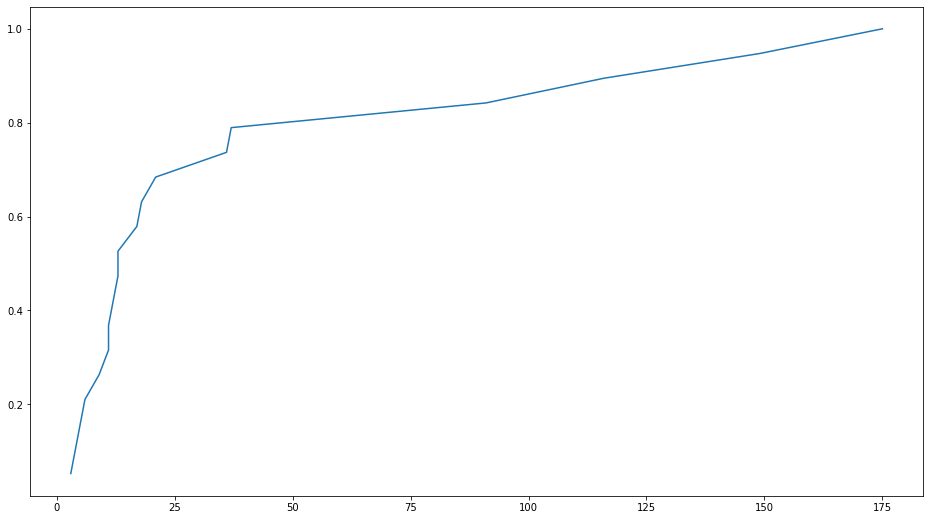

In [75]:
plt.plot(y.x, y.y) #функция распределения времени задержки из-за секьюрити

In [76]:
import seaborn as sns

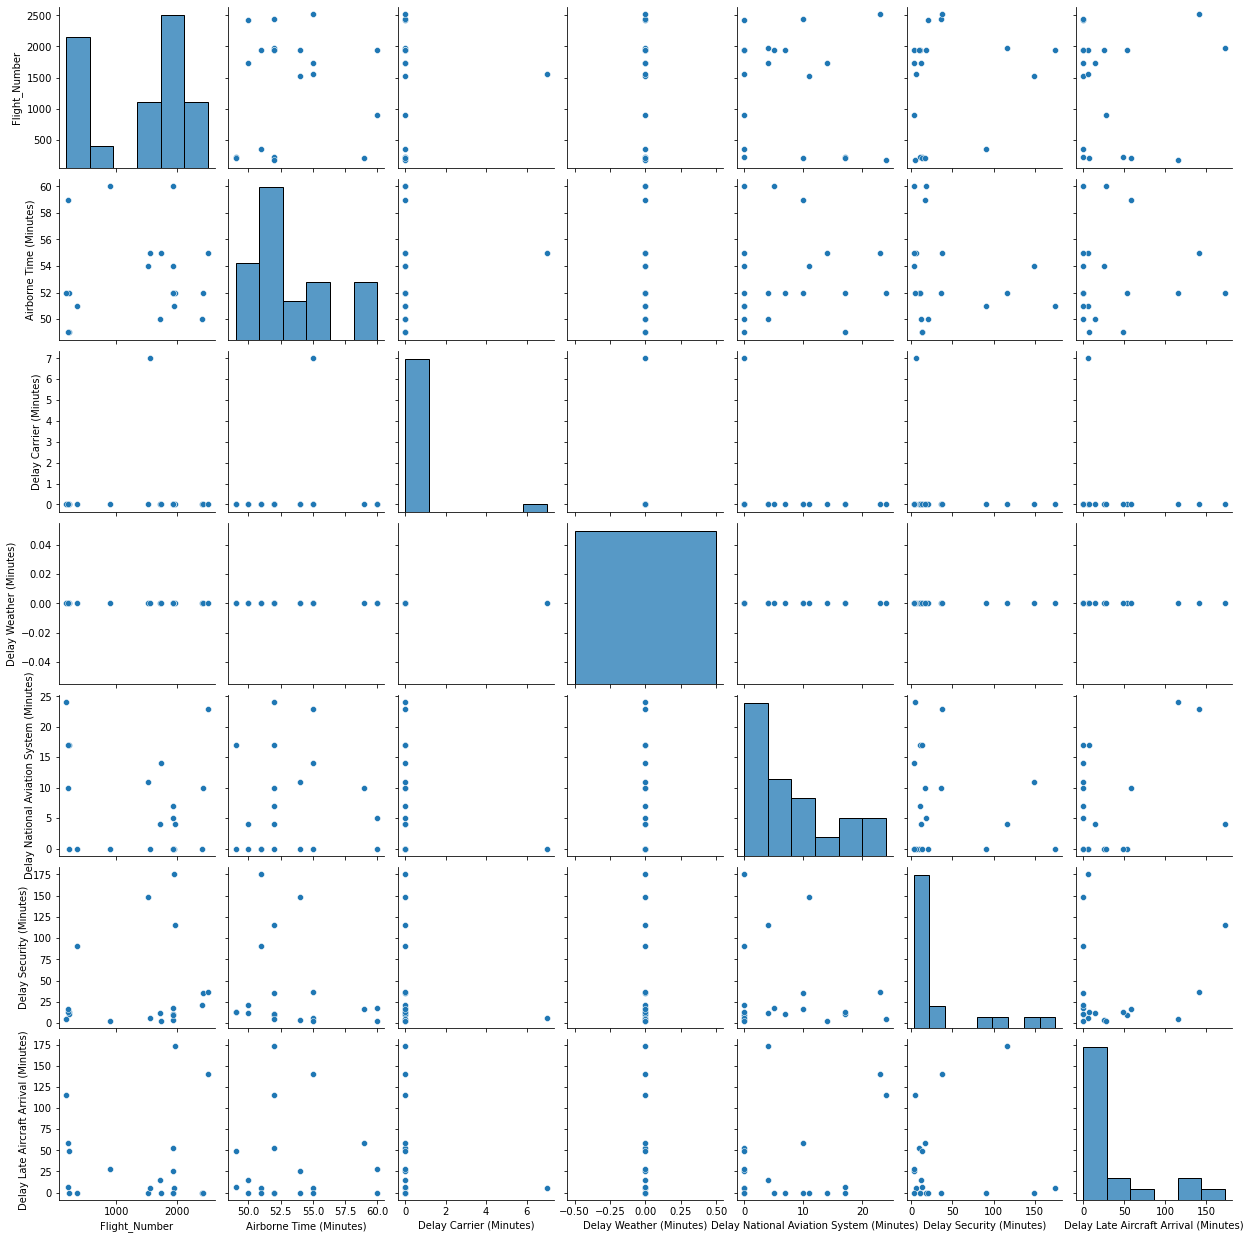

In [77]:
sns.pairplot(secur_table) #для задержки по секьюрити бред

In [78]:
secur = table.loc[table['Delay Late Aircraft Arrival (Minutes)'] == 0].index

secur_table = table.drop(secur)
secur_table = secur_table[:-1]

In [79]:
secur_table = secur_table[:-1]

In [80]:
secur_table.sort_values(by = 'Delay Late Aircraft Arrival (Minutes)')

,Carrier Code,Date (MM/DD/YYYY),Flight_Number,Tail Number,Origin Airport,Destination Airport,Airborne Time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
8059,AA,04/23/2007,1928.0,N4WRAA,LAX,SFO,59.0,16.0,0.0,0.0,0.0,1.0
23333,AA,02/07/2014,209.0,N3JSAA,LAX,SFO,79.0,0.0,0.0,146.0,0.0,1.0
5434,AA,03/31/2006,1942.0,N4WJAA,LAX,SFO,58.0,0.0,0.0,15.0,0.0,1.0
5224,AA,02/27/2006,1928.0,N210AA,LAX,SFO,64.0,0.0,0.0,65.0,0.0,1.0
7275,AA,12/28/2006,438.0,N202AA,LAX,SFO,57.0,31.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9468,AA,11/18/2007,1446.0,N596AA,LAX,SFO,52.0,0.0,0.0,0.0,0.0,285.0
9780,AA,01/04/2008,1954.0,N207AA,LAX,SFO,76.0,0.0,0.0,73.0,0.0,304.0
24150,AA,06/23/2014,1143.0,N5CCAA,LAX,SFO,55.0,0.0,0.0,27.0,0.0,311.0
13274,AA,06/19/2009,1954.0,N5CUAA,LAX,SFO,56.0,6.0,0.0,0.0,0.0,321.0


In [81]:
t = np.array(secur_table['Delay Late Aircraft Arrival (Minutes)'])

In [82]:
t = np.sort(t)

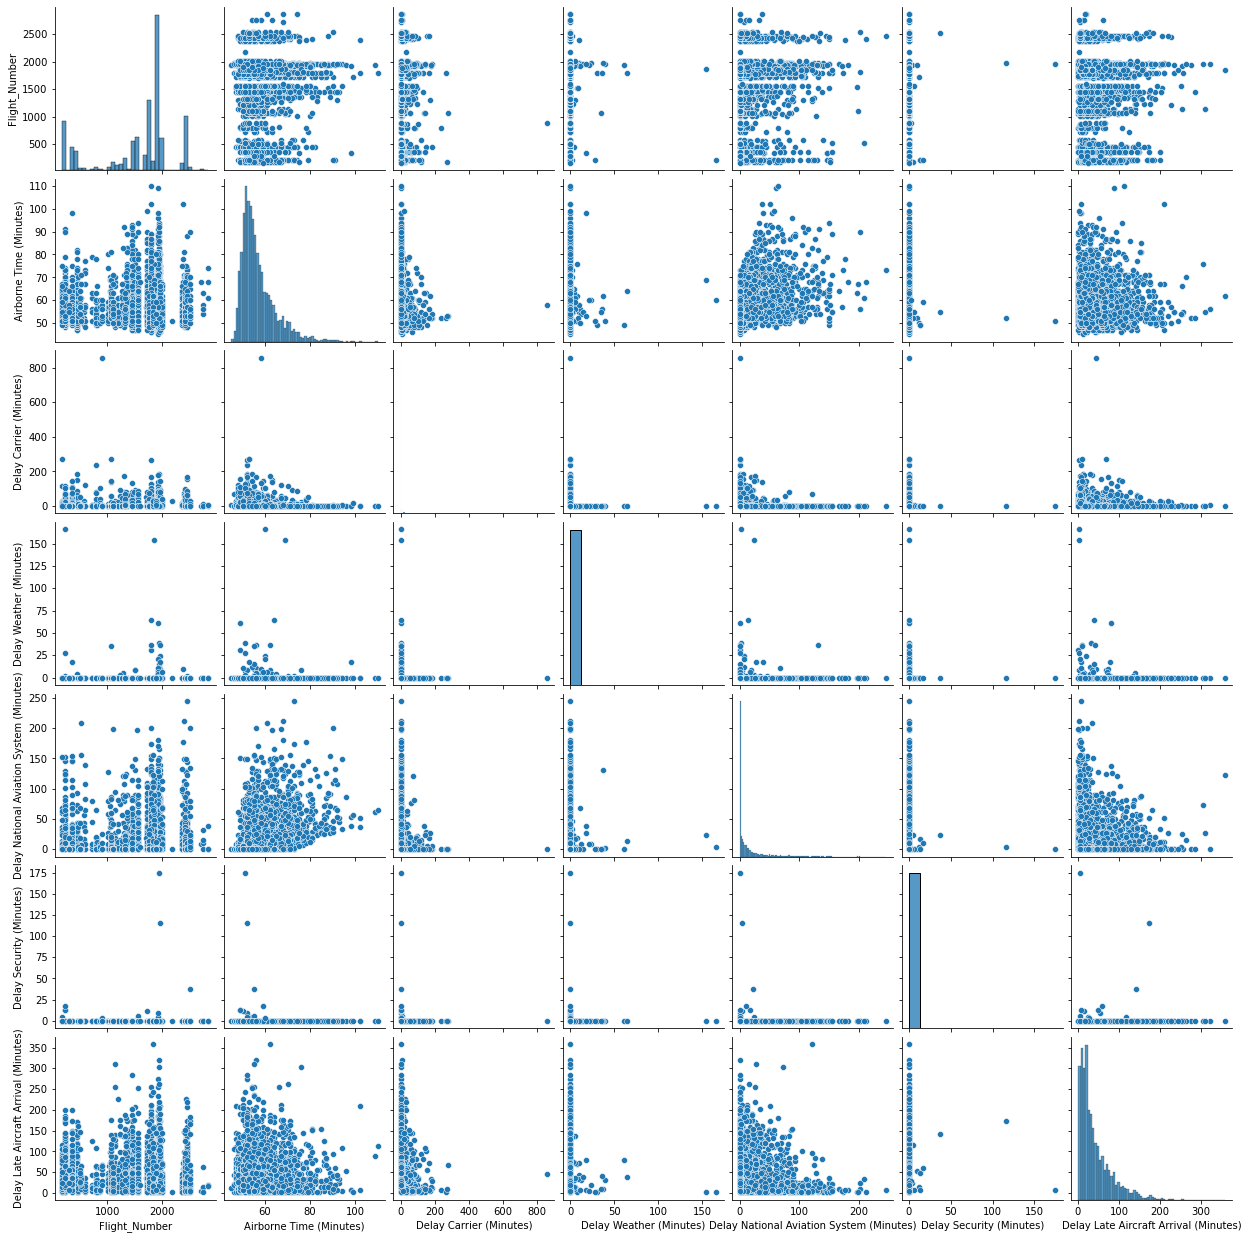

In [83]:
sns.pairplot(secur_table)

In [106]:
import bokeh

In [107]:
secur = table.loc[table['Delay National Aviation System (Minutes)'] == 0].index

secur_table = table.drop(secur)
secur_table = secur_table[:-1]

In [109]:
secur_table.sort_values(by = 'Delay National Aviation System (Minutes)')

,Carrier Code,Date (MM/DD/YYYY),Flight_Number,Tail Number,Origin Airport,Destination Airport,Airborne Time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
7622,AA,02/17/2007,1936.0,N473AA,LAX,SFO,50.0,3.0,0.0,1.0,0.0,24.0
24398,AA,08/04/2014,209.0,N5DYAA,LAX,SFO,51.0,0.0,0.0,1.0,0.0,77.0
21099,AA,01/27/2013,1967.0,N3CPAA,LAX,SFO,53.0,0.0,0.0,1.0,0.0,17.0
20293,AA,09/12/2012,2459.0,N3ADAA,LAX,SFO,52.0,22.0,0.0,1.0,0.0,0.0
24393,AA,08/03/2014,219.0,N3DHAA,LAX,SFO,55.0,0.0,0.0,1.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,AA,04/12/2012,1798.0,N3AEAA,LAX,SFO,95.0,0.0,0.0,274.0,0.0,0.0
16592,AA,12/27/2010,1920.0,N494AA,LAX,SFO,61.0,0.0,0.0,275.0,0.0,0.0
28207,AA,05/20/2016,353.0,N029AA,LAX,SFO,57.0,0.0,0.0,280.0,0.0,0.0
30170,AA,09/10/2019,1319.0,N586UW,LAX,SFO,54.0,0.0,0.0,282.0,0.0,0.0


In [110]:
t = np.sort(np.array(secur_table['Delay National Aviation System (Minutes)'])[:-1])

In [111]:
u = scipy.stats.uniform.rvs(size = len(t))

In [112]:
t = t+ u

In [113]:
y= ECDF(t)

In [114]:
c1, c2 = scipy.stats.expon.fit(t)

In [115]:
c1, c2

(1.0187248543247973, 39.17602514741395)

In [116]:
v = scipy.stats.expon.rvs(size = len(t), scale = 39.19, loc = 1)

In [117]:
w = ECDF(np.sort(v))

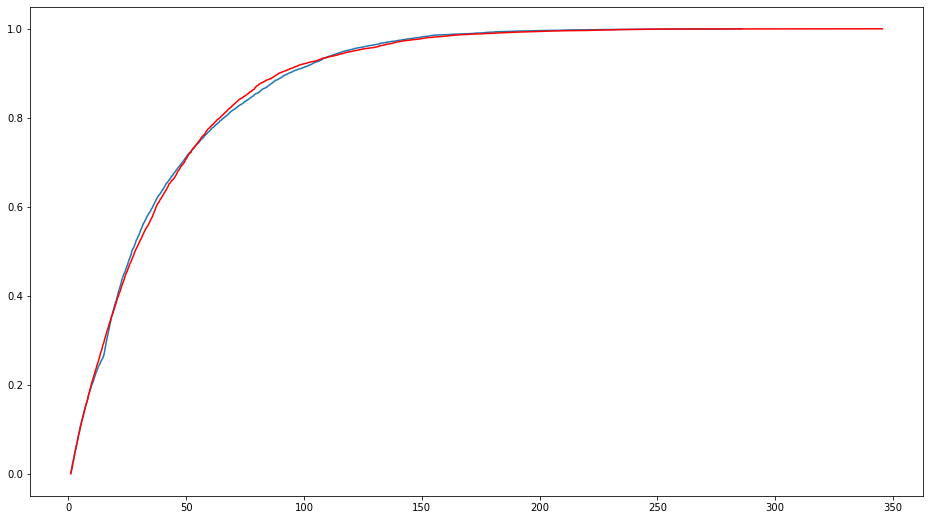

In [118]:
plt.plot(y.x, y.y)
plt.plot(w.x , w.y, color = 'red') #экспоненциальное с параметрами: loc = 1, scale = 39.19 для отложенных 
#national aviation system рейсов

In [122]:
kstest(t, 'expon', (1.018, 39.19))

KstestResult(statistic=0.03566923573495001, pvalue=2.932424203810334e-07)

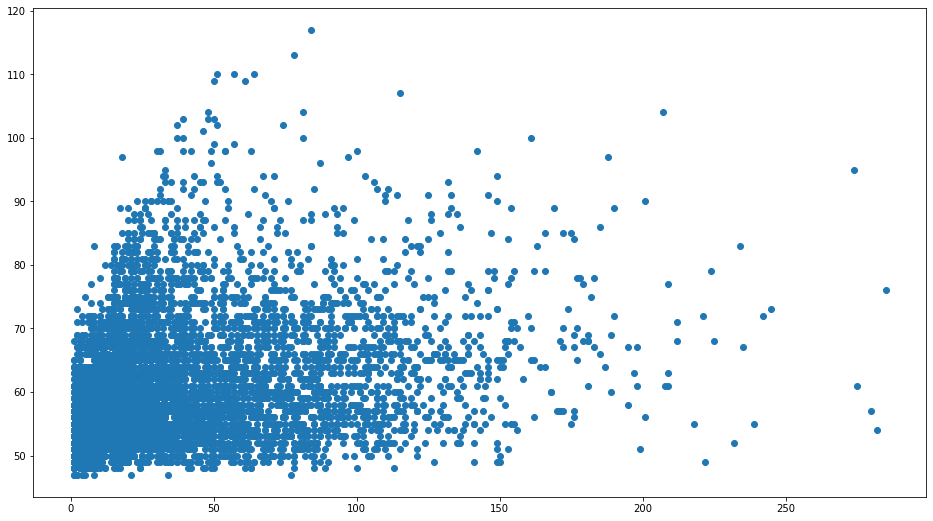

In [124]:
plt.scatter(secur_table['Delay National Aviation System (Minutes)'], secur_table['Airborne Time (Minutes)'])

In [125]:
X = np.array(secur_table['Delay National Aviation System (Minutes)']).reshape((-1,1))
Y = np.array(secur_table['Airborne Time (Minutes)'])

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
model = LinearRegression()

In [128]:
model = model.fit(X,Y)

In [129]:
r_sq = model.score(X, Y)

In [130]:
r_sq

0.06408358189044905

In [131]:
x = np.linspace(0,200,1000).reshape((-1,1))
y = model.predict(x)

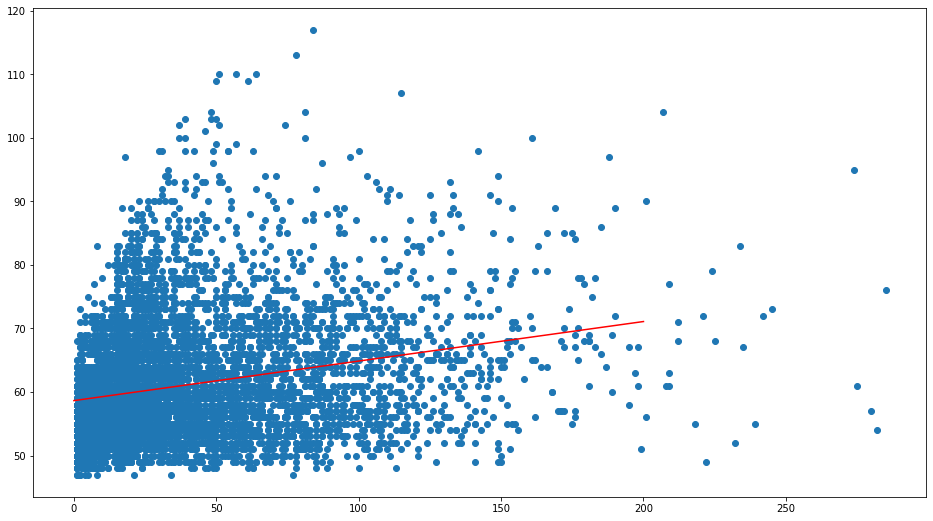

In [132]:
plt.xlim = (0,200)
plt.ylim = (0,120)
plt.scatter(secur_table['Delay National Aviation System (Minutes)'], secur_table['Airborne Time (Minutes)'])
plt.plot(x,y, color = 'red')

In [133]:
weather = table.loc[table['Delay Weather (Minutes)'] == 0].index

weather_table = table.drop(weather)
weather_table = weather_table[:-1]

In [134]:
weather_table

,Carrier Code,Date (MM/DD/YYYY),Flight_Number,Tail Number,Origin Airport,Destination Airport,Airborne Time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
311,AA,02/20/2004,1936.0,N409AA,LAX,SFO,51.0,0.0,7.0,4.0,0.0,9.0
2001,AA,10/27/2004,1936.0,N297AA,LAX,SFO,60.0,0.0,29.0,27.0,0.0,0.0
2425,AA,12/27/2004,1976.0,N259AA,LAX,SFO,55.0,0.0,10.0,0.0,0.0,43.0
2426,AA,12/28/2004,1519.0,N3DAAA,LAX,SFO,62.0,0.0,8.0,0.0,0.0,69.0
2427,AA,12/28/2004,1920.0,N4YHAA,LAX,SFO,52.0,0.0,1.0,17.0,0.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27298,AA,12/13/2015,1203.0,N3MPAA,LAX,SFO,64.0,0.0,59.0,7.0,0.0,0.0
27342,AA,12/22/2015,209.0,N861AA,LAX,SFO,60.0,0.0,14.0,4.0,0.0,0.0
27770,AA,03/07/2016,2438.0,N3DYAA,LAX,SFO,59.0,0.0,75.0,0.0,0.0,0.0
27781,AA,03/09/2016,1071.0,N795AA,LAX,SFO,55.0,0.0,35.0,0.0,0.0,9.0


In [135]:
wt = weather_table['Delay Weather (Minutes)']

In [136]:
u = scipy.stats.uniform.rvs(size =len(wt))

In [137]:
wt = np.sort(np.array(wt))

In [138]:
wecdf = ECDF(wt + u)

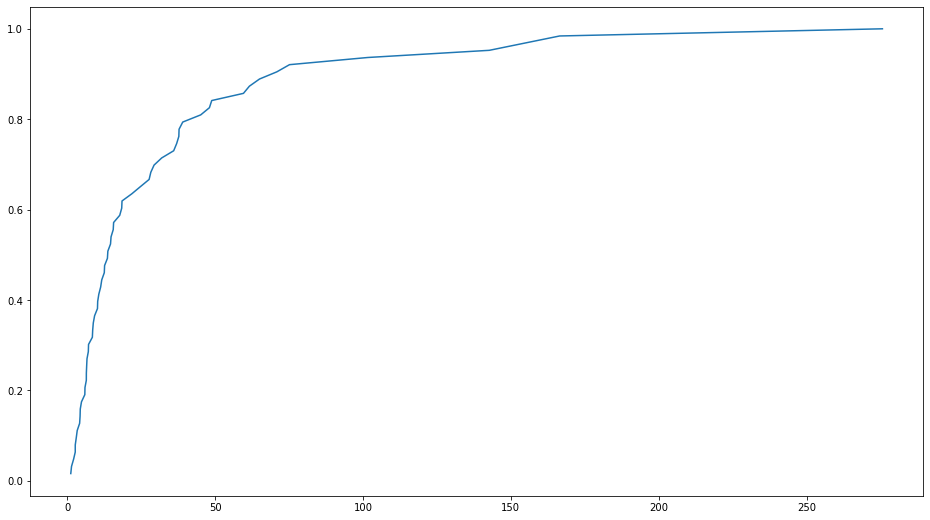

In [139]:
plt.plot(wecdf.x, wecdf.y)

In [140]:
v = scipy.stats.expon.rvs(size = len(t), scale = 25, loc = 1)
vecdf = ECDF(v)

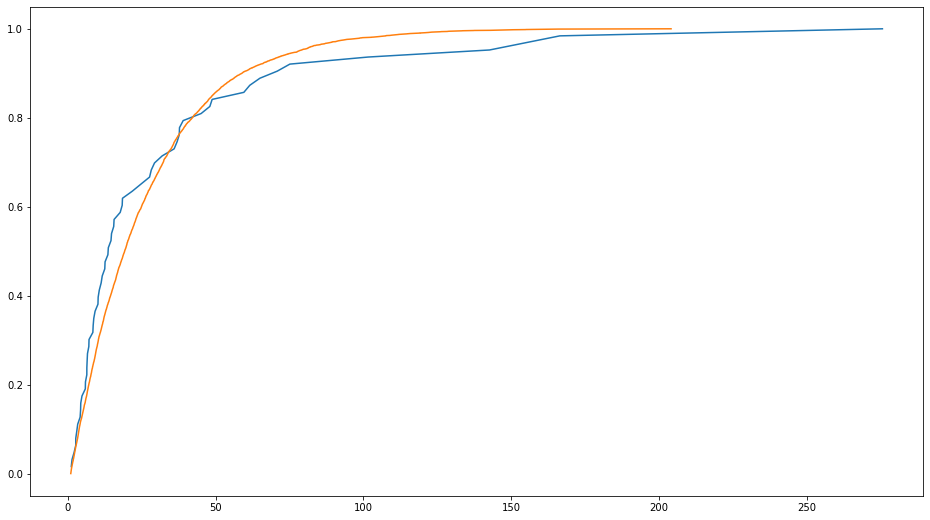

In [141]:
plt.plot(wecdf.x, wecdf.y)
plt.plot(vecdf.x, vecdf.y) #не ложится

In [142]:
wecdf = ECDF(wt[:-2] + u[:-2])

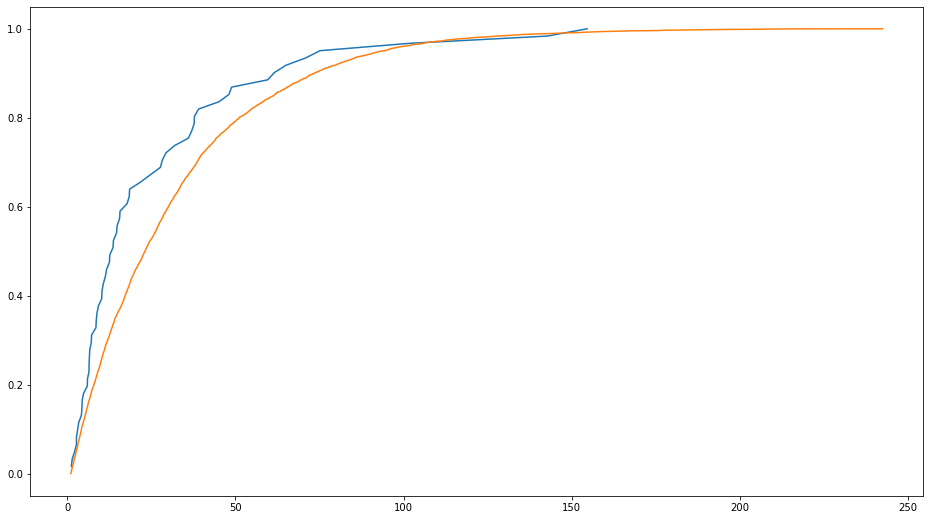

In [143]:
v = scipy.stats.expon.rvs(size = len(t), scale = 31.45, loc = 1)
vecdf = ECDF(v)
plt.plot(wecdf.x, wecdf.y)
plt.plot(vecdf.x, vecdf.y) 

In [462]:
tableau = weather_table[:17]

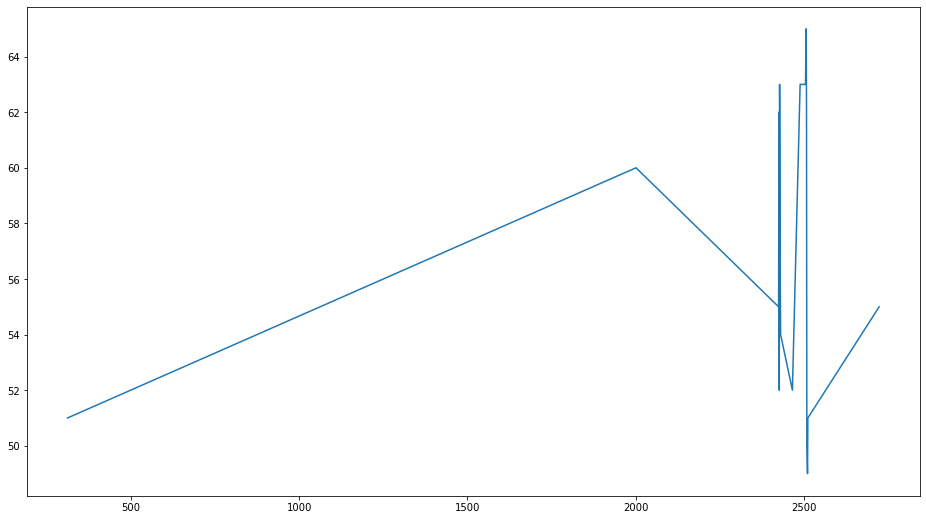

In [463]:
y = ECDF(tableau['Airborne Time (Minutes)'])

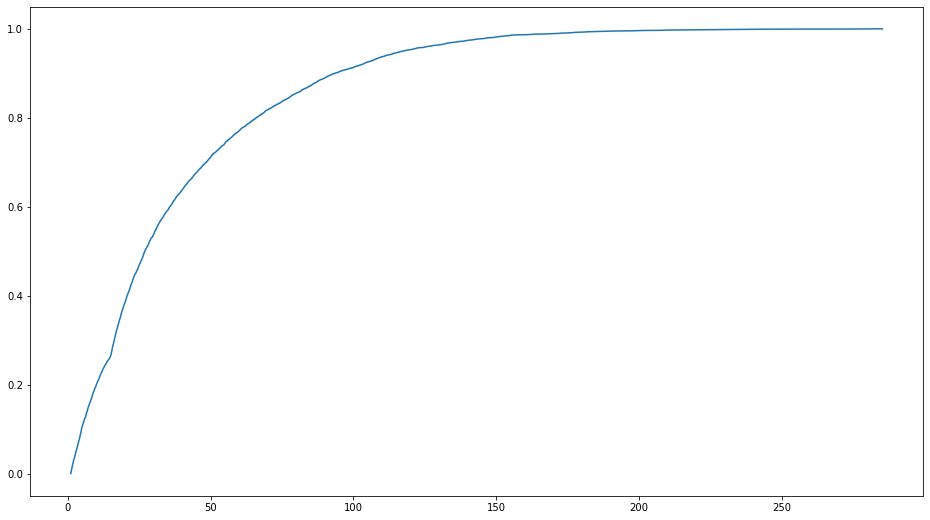

In [464]:
plt.plot(y.x, y.y)

In [145]:
date = np.array(weather_table['Date (MM/DD/YYYY)'])

In [146]:
date = np.array(weather_table['Date (MM/DD/YYYY)'])
number_date = []
for dat in date:
    t = dat.split("/")
    number_date.append(t)
    

In [147]:
number_date

[['02', '20', '2004'],
 ['10', '27', '2004'],
 ['12', '27', '2004'],
 ['12', '28', '2004'],
 ['12', '28', '2004'],
 ['12', '28', '2004'],
 ['12', '28', '2004'],
 ['12', '28', '2004'],
 ['01', '03', '2005'],
 ['01', '06', '2005'],
 ['01', '08', '2005'],
 ['01', '08', '2005'],
 ['01', '08', '2005'],
 ['01', '09', '2005'],
 ['01', '09', '2005'],
 ['01', '09', '2005'],
 ['02', '11', '2005'],
 ['02', '11', '2005'],
 ['02', '18', '2005'],
 ['02', '19', '2005'],
 ['02', '21', '2005'],
 ['02', '21', '2005'],
 ['03', '22', '2005'],
 ['01', '01', '2006'],
 ['01', '01', '2006'],
 ['01', '02', '2006'],
 ['01', '02', '2006'],
 ['01', '02', '2006'],
 ['02', '27', '2006'],
 ['03', '28', '2006'],
 ['04', '04', '2006'],
 ['04', '04', '2006'],
 ['09', '04', '2007'],
 ['03', '04', '2008'],
 ['03', '18', '2008'],
 ['01', '03', '2011'],
 ['03', '20', '2011'],
 ['04', '26', '2011'],
 ['10', '05', '2011'],
 ['11', '04', '2011'],
 ['11', '30', '2011'],
 ['12', '12', '2011'],
 ['01', '21', '2012'],
 ['03', '17

In [148]:
number_date = list(set(date))

In [149]:
number_date

['12/27/2004',
 '12/13/2015',
 '01/02/2006',
 '04/13/2012',
 '03/22/2005',
 '10/27/2004',
 '01/03/2005',
 '01/06/2005',
 '07/18/2015',
 '03/20/2011',
 '01/10/2013',
 '12/28/2004',
 '02/27/2006',
 '02/11/2005',
 '11/30/2011',
 '01/01/2006',
 '03/04/2008',
 '03/09/2016',
 '01/08/2005',
 '02/28/2015',
 '03/18/2008',
 '03/28/2006',
 '12/03/2015',
 '12/22/2015',
 '10/05/2011',
 '02/18/2005',
 '11/16/2012',
 '02/26/2014',
 '12/12/2011',
 '02/21/2005',
 '01/21/2012',
 '11/04/2011',
 '12/25/2012',
 '11/19/2014',
 '02/19/2005',
 '01/09/2005',
 '03/17/2012',
 '01/03/2011',
 '02/20/2004',
 '09/19/2016',
 '09/04/2007',
 '11/07/2012',
 '04/26/2011',
 '12/03/2014',
 '03/07/2016',
 '04/04/2006']

In [150]:
number_datee = []
for dat in number_date:
    t = dat.split("/")
    number_datee.append(t)
winter = []
spring = []
summer = []
autumn = []
table
for date in number_datee:
    if((date[0] == '01') or (date[0] == '02') or (date[0] == '12')):
        winter += 1
    if((date[0] == '03') or (date[0] == '04') or (date[0] == '05')):
        spring += 1
    if((date[0] == '06') or(date[0] == '07') or (date[0] == '08')):
        summer += 1
    if((date[0] == '09') or (date[0] == '10') or (date[0] == '11')):
        autumn += 1

In [151]:
winter = 0
spring = 0
summer = 0
autumn = 0
for date in number_datee:
    if((date[0] == '01') or (date[0] == '02') or (date[0] == '12')):
        winter += 1
    if((date[0] == '03') or (date[0] == '04') or (date[0] == '05')):
        spring += 1
    if((date[0] == '06') or(date[0] == '07') or (date[0] == '08')):
        summer += 1
    if((date[0] == '09') or (date[0] == '10') or (date[0] == '11')):
        autumn += 1

In [152]:
print(winter, spring, summer, autumn)

25 11 1 9


In [153]:
seasons = [winter, spring, summer, autumn]

<BarContainer object of 4 artists>

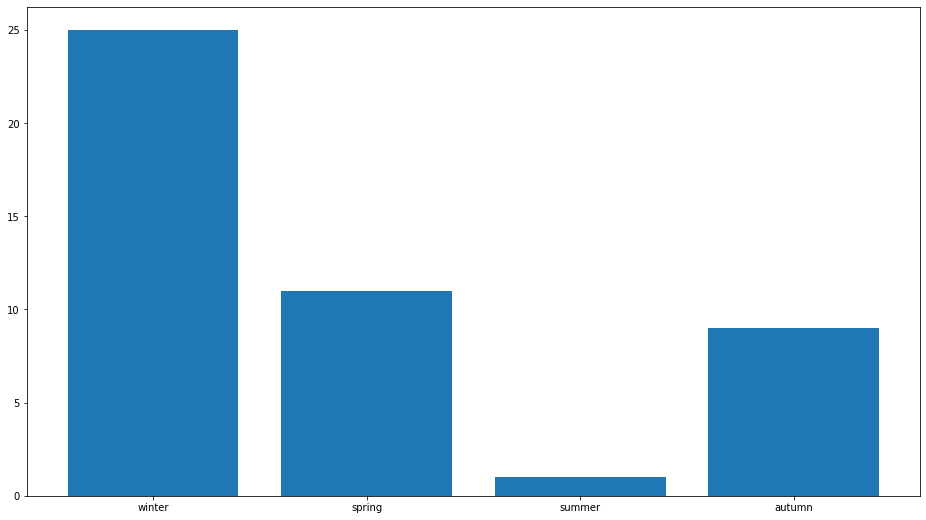

In [154]:
plt.bar(['winter','spring','summer','autumn'], [winter, spring, summer, autumn])

In [155]:
#выкинем шторм 2004-2005

In [156]:
date = np.array(weather_table['Date (MM/DD/YYYY)'])
date_without_duplicates = []
for obj in date:
    if obj not in date_without_duplicates:
        date_without_duplicates.append(obj)


In [157]:
date = date_without_duplicates

In [158]:
dat = []

In [159]:
dat.append(date[0])
dat.extend(date[7:])

In [160]:
number_datee = []
for date in dat:
    t = date.split("/")
    number_datee.append(t)

In [161]:
number_datee

[['02', '20', '2004'],
 ['01', '09', '2005'],
 ['02', '11', '2005'],
 ['02', '18', '2005'],
 ['02', '19', '2005'],
 ['02', '21', '2005'],
 ['03', '22', '2005'],
 ['01', '01', '2006'],
 ['01', '02', '2006'],
 ['02', '27', '2006'],
 ['03', '28', '2006'],
 ['04', '04', '2006'],
 ['09', '04', '2007'],
 ['03', '04', '2008'],
 ['03', '18', '2008'],
 ['01', '03', '2011'],
 ['03', '20', '2011'],
 ['04', '26', '2011'],
 ['10', '05', '2011'],
 ['11', '04', '2011'],
 ['11', '30', '2011'],
 ['12', '12', '2011'],
 ['01', '21', '2012'],
 ['03', '17', '2012'],
 ['04', '13', '2012'],
 ['11', '07', '2012'],
 ['11', '16', '2012'],
 ['12', '25', '2012'],
 ['01', '10', '2013'],
 ['02', '26', '2014'],
 ['11', '19', '2014'],
 ['12', '03', '2014'],
 ['02', '28', '2015'],
 ['07', '18', '2015'],
 ['12', '03', '2015'],
 ['12', '13', '2015'],
 ['12', '22', '2015'],
 ['03', '07', '2016'],
 ['03', '09', '2016'],
 ['09', '19', '2016']]

In [162]:
winter = 0
spring = 0
summer = 0
autumn = 0
for date in number_datee:
    if((date[0] == '01') or (date[0] == '02') or (date[0] == '12')):
        winter += 1
    if((date[0] == '03') or (date[0] == '04') or (date[0] == '05')):
        spring += 1
    if((date[0] == '06') or(date[0] == '07') or (date[0] == '08')):
        summer += 1
    if((date[0] == '09') or (date[0] == '10') or (date[0] == '11')):
        autumn += 1

<BarContainer object of 4 artists>

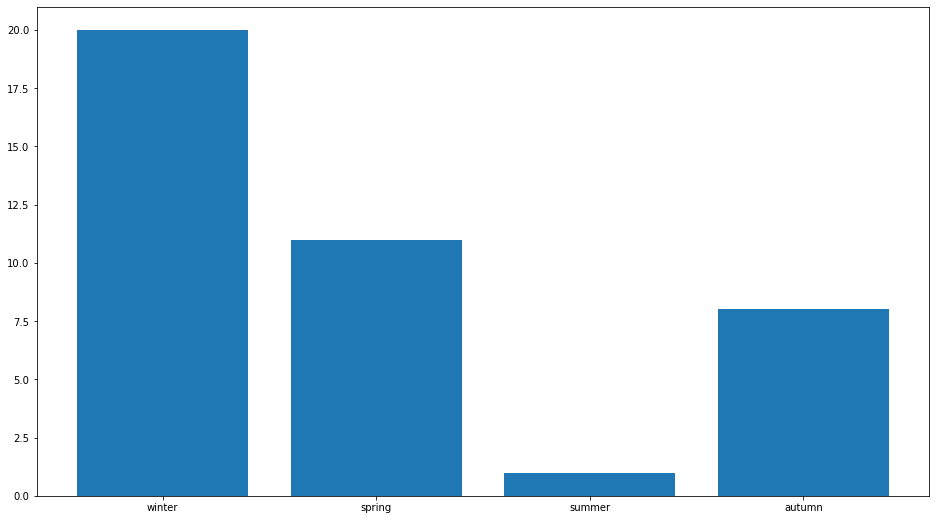

In [163]:
plt.bar(['winter','spring','summer','autumn'], [winter, spring, summer, autumn])

In [164]:
winter = 0
spring = 0
summer = 0
autumn = 0
for date in number_date:
    if((date[0] == '01') or (date[0] == '02') or (date[0] == '12')):
        winter += 1
    if((date[0] == '03') or (date[0] == '04') or (date[0] == '05')):
        spring += 1
    if((date[0] == '06') or(date[0] == '07') or (date[0] == '08')):
        summer += 1
    if((date[0] == '09') or (date[0] == '10') or (date[0] == '11')):
        autumn += 1

<BarContainer object of 4 artists>

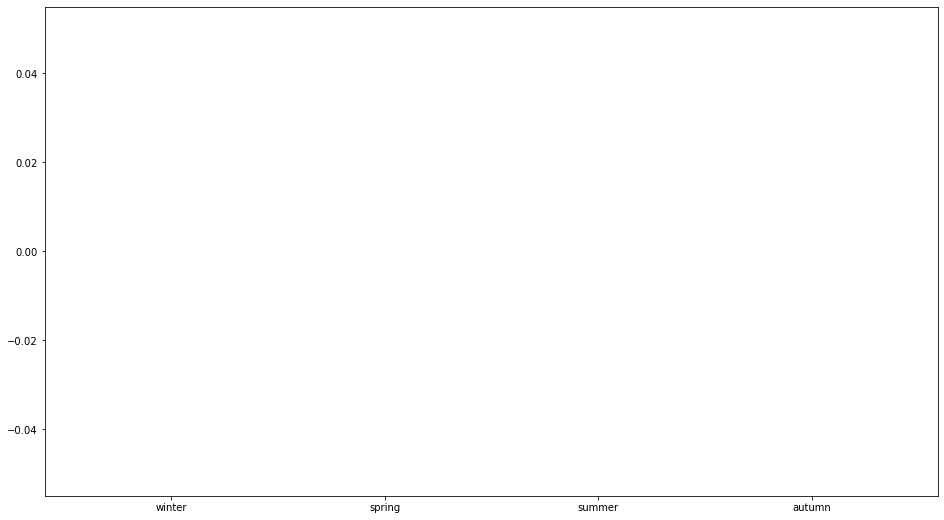

In [165]:
plt.bar(['winter','spring','summer','autumn'], [winter, spring, summer, autumn])

In [166]:
carrier = table.loc[table['Delay Carrier (Minutes)'] == 0].index

carrier_table = table.drop(carrier)
carrier_table = carrier_table[:-1]

In [167]:
carrier_delays = carrier_table['Delay Carrier (Minutes)']

In [168]:
car_del = np.sort(np.array(carrier_delays))

In [169]:
u = scipy.stats.uniform.rvs(size = len(car_del) - 1)

In [170]:
car_del = car_del[:-1] + u

In [171]:
cd = ECDF(car_del)

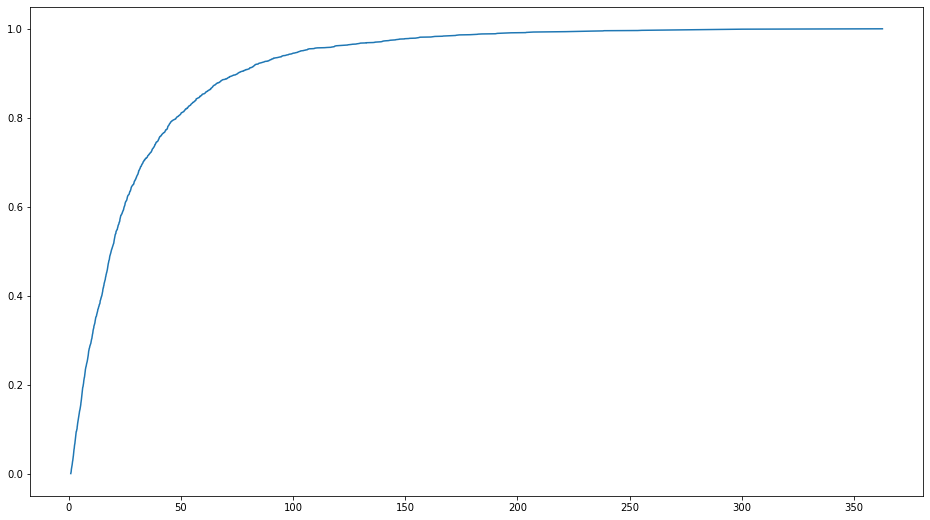

In [183]:
plt.plot(cd.x, cd.y)

In [210]:
car_del.mean()

32.00513604761611

In [211]:
c0,c1,c2 = scipy.stats.weibull_min.fit(car_del)

In [212]:
c0,c1,c2

(0.86802743778219, 1.0011887196000349, 31.201723419082036)

In [213]:
rvss = scipy.stats.weibull_min.rvs(size = 10000, scale = 28.82, loc = 1, c = 0.88)

In [214]:
y = ECDF(rvss)

In [215]:
kstest(car_del, 'weibull_min',  ( 0.868, 1, 31.201723419082036))

KstestResult(statistic=0.059167390778347206, pvalue=1.531033927850773e-07)

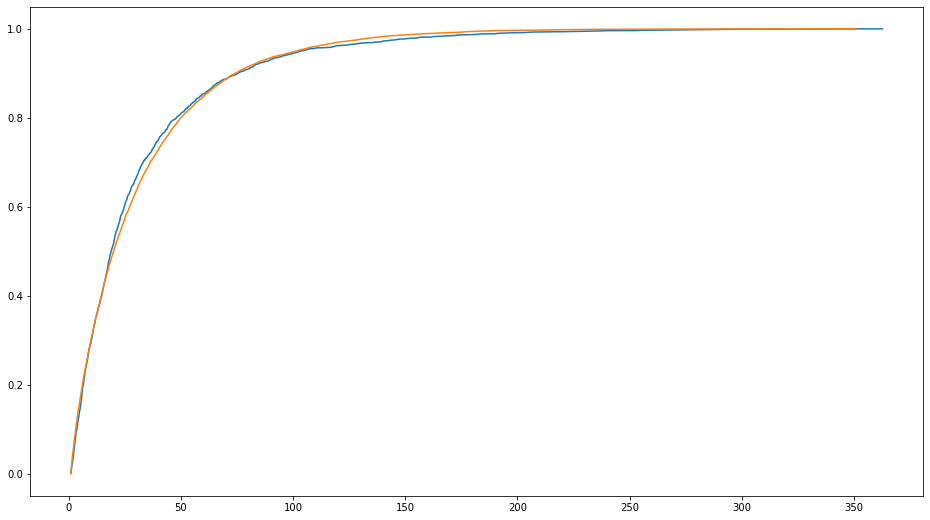

In [216]:
plt.plot(cd.x, cd.y)
plt.plot(y.x, y.y) #распределение задержек Delay Carrier распределено по вейбуллу с параметрами loc = 1 scale =28.84, c=0.88

In [449]:
table = table.dropna()

In [450]:
vals = table.loc[table['Airborne Time (Minutes)'] == 0].index

In [451]:
table1 = table.drop(vals)

In [456]:
table1

,Carrier Code,Date (MM/DD/YYYY),Flight_Number,Tail Number,Origin Airport,Destination Airport,Airborne Time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
1,AA,01/01/2004,1920.0,N442AA,LAX,SFO,74.0,0.0,0.0,32.0,0.0,0.0
3,AA,01/01/2004,1936.0,N442AA,LAX,SFO,55.0,23.0,0.0,1.0,0.0,11.0
4,AA,01/01/2004,1942.0,N513AA,LAX,SFO,57.0,0.0,0.0,0.0,0.0,0.0
5,AA,01/01/2004,1950.0,N421AA,LAX,SFO,58.0,0.0,0.0,0.0,0.0,0.0
6,AA,01/01/2004,1958.0,N513AA,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31114,AA,07/02/2020,2511.0,N758US,LAX,SFO,51.0,0.0,0.0,0.0,0.0,0.0
31115,AA,07/03/2020,2511.0,N836AW,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0
31116,AA,07/04/2020,2511.0,N837AW,LAX,SFO,53.0,0.0,0.0,0.0,0.0,0.0
31117,AA,07/05/2020,2511.0,N764US,LAX,SFO,54.0,0.0,0.0,0.0,0.0,0.0


In [457]:
dates = np.array(table1['Date (MM/DD/YYYY)'])

In [458]:
date_without_duplicates = []
for obj in dates:
    if obj not in date_without_duplicates:
        date_without_duplicates.append(obj)



In [459]:
number_datee = []
for dat in dates:
    t = dat.split("/")
    number_datee.append(t)

In [460]:
table1['Good Date'] = number_datee

In [223]:
winter = []
spring = []
summer = []
autumn = []
for data in number_datee.rowd:
    if((data[0] == '01') or (data[0] == '02') or (data[0] == '12')):
        winter += 1
    if((data[0] == '03') or (data[0] == '04') or (data[0] == '05')):
        spring += 1
    if((data[0] == '06') or(data[0] == '07') or (data[0] == '08')):
        summer += 1
    if((data[0] == '09') or (data[0] == '10') or (data[0] == '11')):
        autumn += 1

In [224]:
by_months = [0]*12

In [225]:
int('01')

1

In [226]:
for data in number_datee:
    by_months[int(data[0]) - 1] += 1

<BarContainer object of 12 artists>

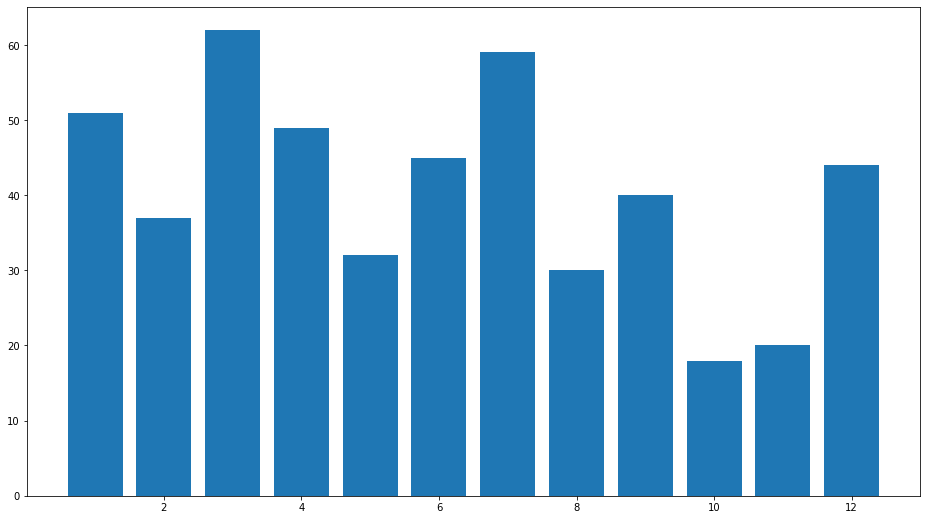

In [227]:
plt.bar([i + 1 for i in range(12)], by_months)

<BarContainer object of 4 artists>

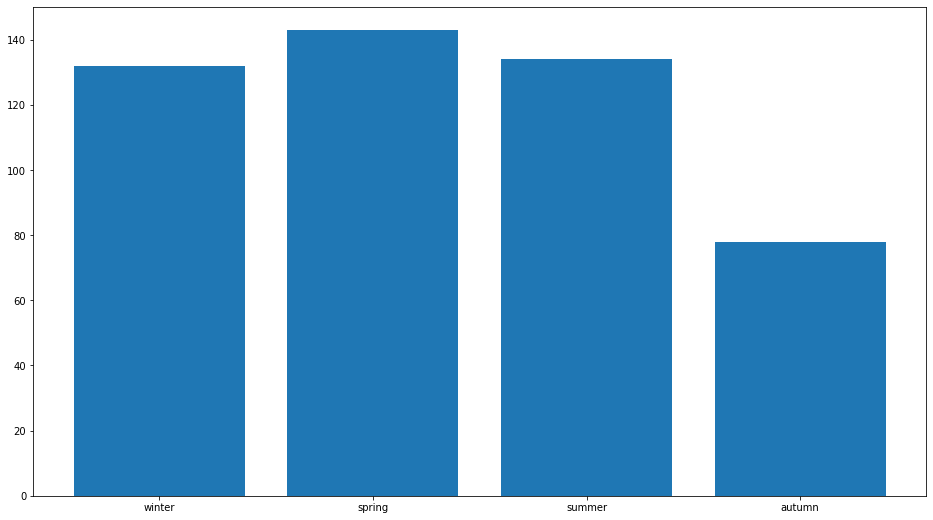

In [228]:
plt.bar(['winter','spring','summer','autumn'], [winter, spring, summer, autumn])

In [229]:
crit = table.loc[table['Airborne Time (Minutes)'] == 0].index
table_minutes = table.drop(crit)

In [230]:
minutes = table_minutes['Airborne Time (Minutes)']

In [231]:
minutes = minutes[:-1]

In [232]:
np.array(minutes).shape

(30632,)

In [233]:
u = scipy.stats.uniform.rvs(size = np.array(minutes).shape[0])

In [234]:
y = ECDF(np.sort(np.array(minutes)) + u)

In [237]:
minutes = (np.sort(np.array(minutes)) + u)[1:]

(array([2.000e+00, 1.200e+01, 3.110e+02, 2.332e+03, 5.680e+03, 6.660e+03,
        5.272e+03, 3.566e+03, 2.157e+03, 1.403e+03, 9.210e+02, 6.010e+02,
        4.540e+02, 3.460e+02, 2.210e+02, 1.660e+02, 1.230e+02, 1.030e+02,
        6.900e+01, 5.900e+01, 3.700e+01, 3.500e+01, 3.000e+01, 1.800e+01,
        1.300e+01, 8.000e+00, 1.100e+01, 6.000e+00, 7.000e+00, 0.000e+00,
        1.000e+00, 5.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 41.64312851,  43.81477054,  45.98641256,  48.15805459,
         50.32969662,  52.50133864,  54.67298067,  56.84462269,
         59.01626472,  61.18790675,  63.35954877,  65.5311908 ,
         67.70283283,  69.87447485,  72.04611688,  74.21775891,
         76.38940093,  78.56104296,  80.73268499,  82.90432701,
         85.07596904,  87.24761107,  89.41925309,  91.59089512,
         93.76253714,  95.93417917,  98.1058212 , 100.27746322,
        102.44910525, 104.62074728, 106.7923893 , 108.96403133,
        111.13567336, 113.30731538, 115.47895741, 117

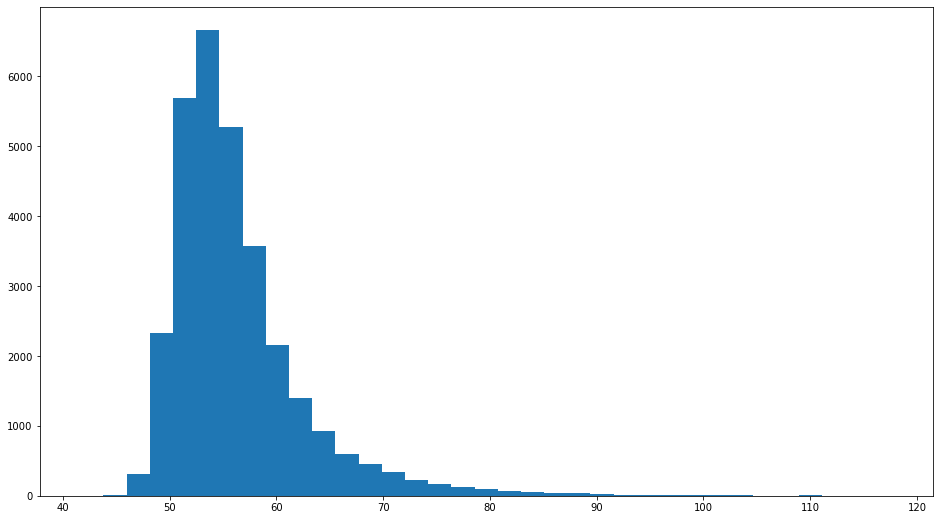

In [239]:
plt.hist(minutes, bins = 35)

In [270]:
c0, c1, c2 = scipy.stats.lognorm.fit(minutes)

In [272]:
c0, c1, c2

(0.36470623041493866, 41.495895879220384, 13.791809153950762)

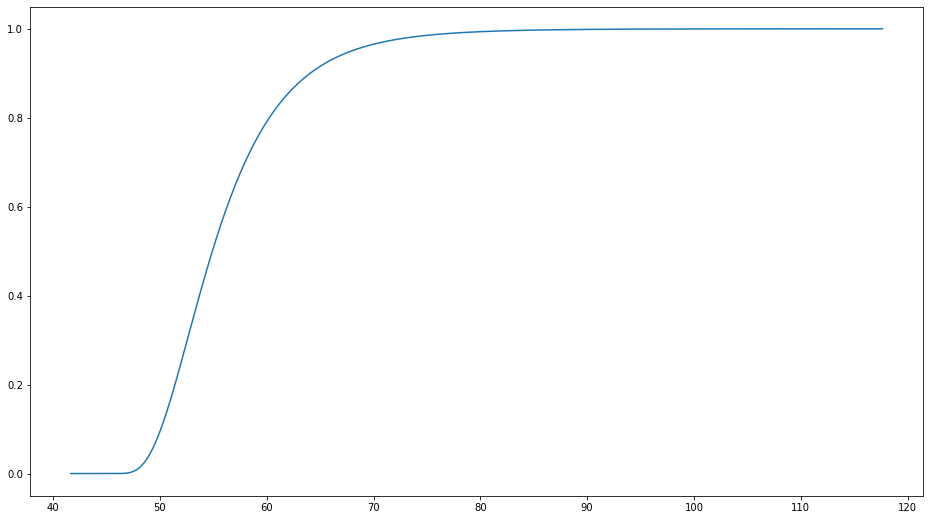

In [441]:
plt.plot(np.sort(minutes), scipy.stats.lognorm.cdf(np.sort(minutes), s = 0.5, loc = 44.7, scale = 10.2))

In [319]:
vals = ECDF(np.sort(scipy.stats.lognorm.rvs(size = np.array(minutes).shape[0], loc = 44.7, scale = 10.2, s = 0.5)))

ValueError: x and y must have same first dimension, but have shapes (30631,) and (6174,)

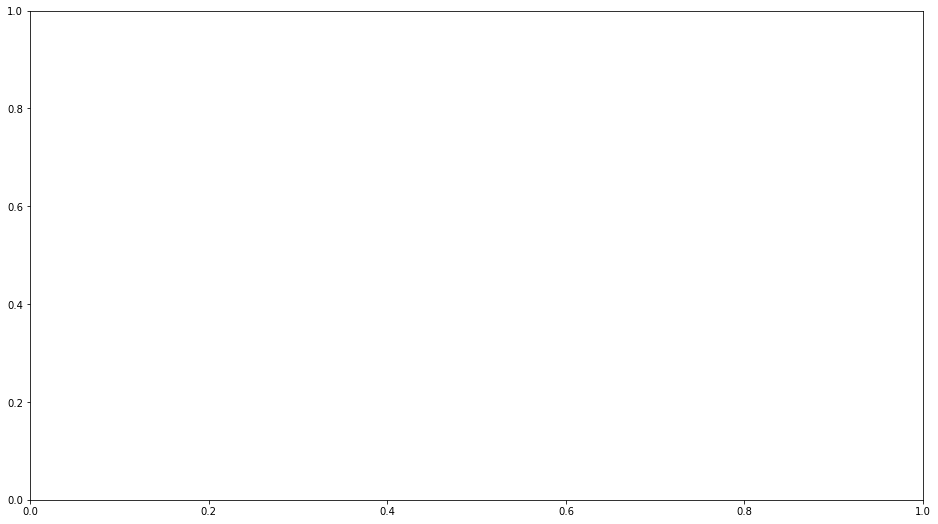

In [444]:
plt.plot(np.sort(minutes), y.y)
plt.plot(np.sort(minutes), scipy.stats.lognorm.cdf(np.sort(minutes), s = 0.5, loc = 44.7, scale = 10.2))#логнормальное с параметрами loc = 45, scale = 10, s = 0.5 для всех длин полетов

In [322]:
kstest(minutes, 'lognorm', (0.5, 44.7, 10))

KstestResult(statistic=0.03695462114958628, pvalue=8.82213300757046e-37)

In [991]:
u = scipy.stats.expon.rvs(size = np.array(minutes).shape[0], loc = c1, scale = c0)

In [1000]:
table_copy = table1.copy(deep = True)